# Go to this [link](https://colab.research.google.com/drive/1UqbekDSqdx4rAU16bKWTmCGlVWUbyrI2) for colab file to see results. Github Has file limit of 25 MB and with results this file is 29 MB

# Acknowledgment and Source of Data

The dataset contains subset of transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 8000 transactions. The dataset is highly unbalanced.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown "140Q-IkU5PtXAsSC9DmUmmZYWJdtVtWHq"
df=pd.read_csv("creditcard.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=140Q-IkU5PtXAsSC9DmUmmZYWJdtVtWHq
To: /content/creditcard.csv
100% 4.23M/4.23M [00:00<00:00, 29.7MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,78025.0,0.941852,-0.221746,1.305384,1.204436,-0.322458,1.645322,-0.877336,0.659350,0.829264,...,0.080895,0.595574,0.160727,-0.634376,0.061047,-0.300853,0.145265,0.027195,9.99,0
1,120473.0,0.021675,0.763849,0.136713,-0.785963,0.606064,-0.581328,0.886407,-0.013007,-0.215579,...,-0.236899,-0.565256,0.023528,-0.425393,-0.479796,0.146289,0.238705,0.082683,7.18,0
2,53036.0,1.227529,0.140234,0.109352,-0.029235,-0.253866,-0.982647,0.270473,-0.203336,-0.403461,...,-0.377098,-1.187139,0.176155,0.351421,0.081029,0.601973,-0.104532,-0.002743,22.99,0
3,36290.0,-0.300821,1.057896,0.828649,-0.329105,0.664441,0.010565,0.588572,0.143733,-0.587943,...,-0.288153,-0.784493,-0.173992,-0.886613,-0.032115,0.126559,0.241068,0.076419,2.69,0
4,49909.0,-1.125842,-0.985710,1.324159,-0.368463,-1.585751,0.716661,1.284507,0.105472,-1.264545,...,0.137634,0.177886,0.755042,-0.088562,0.006995,-0.428265,0.034477,0.170550,416.00,0


In [ ]:
df.shape

(8000, 31)

In [ ]:
df.info()         #3 are object and rest are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8000 non-null   float64
 1   V1      8000 non-null   float64
 2   V2      8000 non-null   float64
 3   V3      8000 non-null   float64
 4   V4      8000 non-null   float64
 5   V5      8000 non-null   float64
 6   V6      8000 non-null   float64
 7   V7      8000 non-null   float64
 8   V8      8000 non-null   float64
 9   V9      8000 non-null   float64
 10  V10     8000 non-null   float64
 11  V11     8000 non-null   float64
 12  V12     8000 non-null   float64
 13  V13     8000 non-null   float64
 14  V14     8000 non-null   float64
 15  V15     8000 non-null   float64
 16  V16     8000 non-null   float64
 17  V17     8000 non-null   float64
 18  V18     8000 non-null   float64
 19  V19     8000 non-null   float64
 20  V20     8000 non-null   float64
 21  V21     8000 non-null   float64
 22  

In [ ]:
df.describe() #5 point summary for numerical columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,94504.401750,-0.296165,0.218245,-0.445457,0.276637,-0.156979,-0.095715,-0.333178,0.035687,-0.149748,...,0.043679,0.009116,0.001712,-0.009283,-0.004062,0.000632,0.010870,0.003893,87.820065,0.06150
std,47553.700564,2.756539,2.079226,2.807152,1.885002,2.021448,1.420893,2.493561,2.009364,1.381567,...,1.193577,0.785360,0.671047,0.607233,0.540851,0.479782,0.516434,0.357895,228.623386,0.24026
min,0.000000,-30.552380,-29.336007,-31.103685,-4.790224,-22.105532,-17.282140,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.325890,-7.263482,-8.307955,0.000000,0.00000
25%,53792.500000,-1.026625,-0.559688,-1.106846,-0.796749,-0.734674,-0.832276,-0.656283,-0.211434,-0.742289,...,-0.217702,-0.535613,-0.168849,-0.364858,-0.327653,-0.329395,-0.069372,-0.052609,4.655000,0.00000
50%,84913.000000,-0.075550,0.118192,0.054102,0.093558,-0.059166,-0.316021,0.006836,0.032753,-0.088387,...,-0.014447,0.017255,-0.013157,0.034430,0.018870,-0.050860,0.006700,0.012789,20.555000,0.00000
75%,139104.000000,1.277632,0.917803,0.956249,0.969840,0.637718,0.349572,0.574413,0.364561,0.564181,...,0.211184,0.533038,0.155102,0.426076,0.355243,0.249238,0.111257,0.088525,78.202500,0.00000
max,172768.000000,2.398119,22.057729,3.770236,12.114672,28.516513,15.323769,15.915767,20.007208,7.929051,...,27.202839,8.361985,13.750136,3.951679,2.782860,2.859167,4.610936,15.373170,5627.060000,1.00000


In [ ]:
for col in df.columns:
  print(col,df[col].nunique())      #class are 2 rest are many unique values

Time 7761
V1 7970
V2 7970
V3 7970
V4 7970
V5 7970
V6 7970
V7 7970
V8 7970
V9 7970
V10 7970
V11 7970
V12 7970
V13 7970
V14 7970
V15 7970
V16 7970
V17 7970
V18 7970
V19 7970
V20 7970
V21 7970
V22 7970
V23 7970
V24 7970
V25 7970
V26 7970
V27 7970
V28 7970
Amount 3598
Class 2


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Preprocessing and train test split


In [ ]:
from sklearn.model_selection import train_test_split
y=df["Class"]
x=df.drop(["Class","Time"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
#this stratify ensures same ratio of classes in test and train set so preserves class ratio

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logical Regression

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    roc_curve,
    RocCurveDisplay,
)

from sklearn.linear_model import LogisticRegression


In [ ]:
log_reg_bal = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg_bal.fit(x_train, y_train)

y_pred = log_reg_bal.predict(x_test)

y_prob = log_reg_bal.predict_proba(x_test)[:, 1]

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
rocauc = roc_auc_score(y_test, y_prob)

print("Logistic Regression (no class_weight) results:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {rocauc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Logistic Regression (no class_weight) results:
Accuracy : 0.9737
Precision: 0.7154
Recall   : 0.9263
F1-score : 0.8073
ROC-AUC  : 0.9833

Confusion Matrix:
[[1467   35]
 [   7   88]]


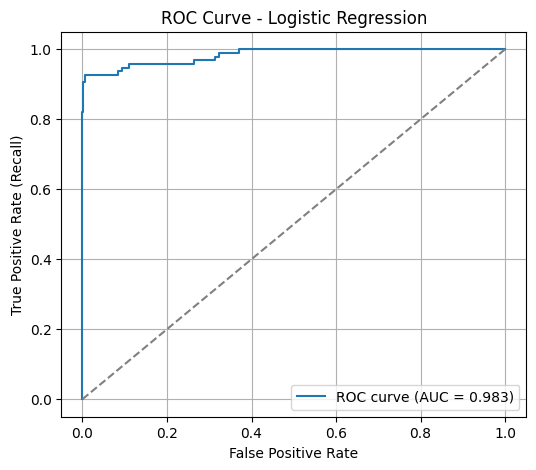

In [ ]:
#ROC curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {rocauc:.3f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree with hyperparamter tunning

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Decision Tree Params: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Best ROC-AUC (CV): 0.7982358029109998

=== Decision Tree Report ===
              precision    recall  f1-score   support

           0     0.9900    0.9907    0.9903      1502
           1     0.8511    0.8421    0.8466        95

    accuracy                         0.9818      1597
   macro avg     0.9205    0.9164    0.9185      1597
weighted avg     0.9818    0.9818    0.9818      1597

ROC-AUC: 0.9177377531712103


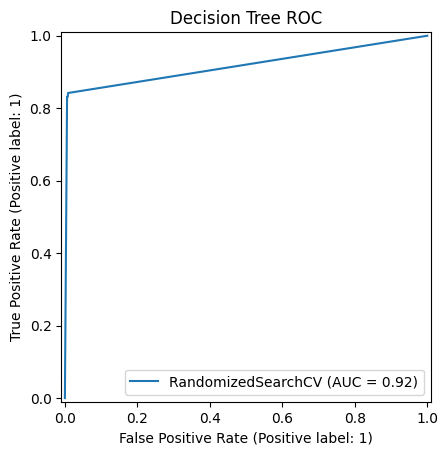

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt_params = {
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy', 'log_loss']
}

dt_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_params,
    n_iter=20,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

dt_search.fit(x_train, y_train)

print("Best Decision Tree Params:", dt_search.best_params_)
print("Best ROC-AUC (CV):", dt_search.best_score_)

y_pred_dt = dt_search.predict(x_test)
y_prob_dt = dt_search.predict_proba(x_test)[:, 1]

print("\n=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_dt, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

RocCurveDisplay.from_estimator(dt_search, x_test, y_test)
plt.title("Decision Tree ROC")
plt.show()


# Random Forest with hyperparamter tunning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=25,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(x_train, y_train)

print("✅ Best Random Forest Params:", rf_search.best_params_)
print("Best F1 (CV):", rf_search.best_score_)

y_pred_rf = rf_search.predict(x_test)
print("\n=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf, digits=4))


Fitting 3 folds for each of 25 candidates, totalling 75 fits
✅ Best Random Forest Params: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Best F1 (CV): 0.9071622037723732

=== Random Forest Report ===
              precision    recall  f1-score   support

           0     0.9921    1.0000    0.9960      1502
           1     1.0000    0.8737    0.9326        95

    accuracy                         0.9925      1597
   macro avg     0.9960    0.9368    0.9643      1597
weighted avg     0.9925    0.9925    0.9922      1597



In [ ]:
y_prob_rf = rf_search.predict_proba(x_test)[:, 1]
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf, zero_division=0)
rec = recall_score(y_test, y_pred_rf, zero_division=0)
f1 = f1_score(y_test, y_pred_rf, zero_division=0)
rocauc = roc_auc_score(y_test, y_prob_rf)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {rocauc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm)

Accuracy : 0.9925
Precision: 1.0000
Recall   : 0.8737
F1-score : 0.9326
ROC-AUC  : 0.9851

Confusion Matrix:
[[1502    0]
 [  12   83]]


# Gradient Boosting with hyperparamter tunning

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

lgbm_params = {
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 20, 40],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 0.1, 1.0],
    'reg_alpha': [0, 0.1, 1.0]
}

lgbm_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_params,
    n_iter=30,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

lgbm_search.fit(x_train, y_train)

print("Best LightGBM Params:", lgbm_search.best_params_)
print("Best F1 (CV):", lgbm_search.best_score_)

y_pred_lgbm = lgbm_search.predict(x_test)
print("\n=== LightGBM Report ===")
print(classification_report(y_test, y_pred_lgbm, digits=4))


#some warnings shown below are harmless and shouldnt be worried about.
#they are due to x being arrays rather than df
#and that LightGBM tried to split nodes but found no features that improved gain, so it stopped growing that tree

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 378, number of negative: 6006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 6384, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_prob = lgbm_search.predict_proba(x_test)[:, 1]

acc = accuracy_score(y_test, y_pred_lgbm)
prec = precision_score(y_test, y_pred_lgbm, zero_division=0)
rec = recall_score(y_test, y_pred_lgbm, zero_division=0)
f1 = f1_score(y_test, y_pred_lgbm, zero_division=0)
rocauc = roc_auc_score(y_test, y_prob)

print("Logistic Regression (no class_weight) results:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {rocauc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Logistic Regression (no class_weight) results:
Accuracy : 0.9912
Precision: 0.9765
Recall   : 0.8737
F1-score : 0.9222
ROC-AUC  : 0.9907

Confusion Matrix:
[[1467   35]
 [   7   88]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
